In [68]:
import numpy as np

import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
forest_data_path = glob.glob("data/forest_ft/*")
tallbuilding_data_path = glob.glob("data/tallbuilding_ft/*")
highway_data_path = glob.glob("data/highway_ft/*")

In [61]:
X = []
Y = []
for item in forest_data_path:
    X.append(np.loadtxt(item))
    Y.append(1)

for item in tallbuilding_data_path:
    X.append(np.loadtxt(item))
    Y.append(2)
    
cC = []
for item in highway_data_path:
    X.append(np.loadtxt(item))
    Y.append(3)
    
# cA = modify_x(np.array(cA))
# cB = modify_x(np.array(cB))
# cC = modify_x(np.array(cC))

X = np.array(X)
for i in range(X.shape[0]):
    X[i] = normalize(X[i])
X = X.reshape(-1,36,23,1)
Y = (np.array(Y))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

Using TensorFlow backend.


In [81]:
model = Sequential()
model.add(Convolution2D(32, 8, strides=(1, 1), input_shape=(36, 23, 1), activation='relu'))
model.add(Convolution2D(64, 4, strides=(1, 1), activation='relu'))
model.add(Convolution2D(128, 4, strides=(1, 1), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 29, 16, 32)        2080      
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 26, 13, 64)        32832     
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 23, 10, 128)       131200    
_________________________________________________________________
flatten_10 (Flatten)         (None, 29440)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               3768448   
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 387       
Total params: 3,934,947
Trainable params: 3,934,947
Non-trainable params: 0
_________________________________________________________________


In [82]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
Y_train_onehot = label_binarizer.fit_transform(Y_train)
Y_test_onehot = label_binarizer.fit_transform(Y_test)

In [83]:
model.compile('adam', loss ='categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(X_train, Y_train_onehot, epochs=25)

Epoch 1/25
660/660 [==============================] - 3s - loss: 1.1129 - acc: 0.3727     
Epoch 2/25
660/660 [==============================] - 1s - loss: 0.9739 - acc: 0.5227     
Epoch 3/25
660/660 [==============================] - 1s - loss: 0.7329 - acc: 0.6939     
Epoch 4/25
660/660 [==============================] - 1s - loss: 0.6050 - acc: 0.7409     
Epoch 5/25
660/660 [==============================] - 1s - loss: 0.5188 - acc: 0.7955     
Epoch 6/25
660/660 [==============================] - 1s - loss: 0.4592 - acc: 0.8303     
Epoch 7/25
660/660 [==============================] - 1s - loss: 0.4145 - acc: 0.8424     
Epoch 8/25
660/660 [==============================] - 1s - loss: 0.3937 - acc: 0.8576     
Epoch 9/25
660/660 [==============================] - 1s - loss: 0.3240 - acc: 0.8758     
Epoch 10/25
660/660 [==============================] - 1s - loss: 0.3076 - acc: 0.8818     
Epoch 11/25
660/660 [==============================] - 1s - loss: 0.3226 - acc: 0.8682   

In [84]:
metrics = model.evaluate(X_test, Y_test_onehot)
for metric_i in range(len(model.metrics_names)):
    metric_name = model.metrics_names[metric_i]
    metric_value = metrics[metric_i]
    print('{}: {}'.format(metric_name, metric_value))

284/284 [==============================] - 0s     
loss: 0.6647049868610543
acc: 0.86267605298002


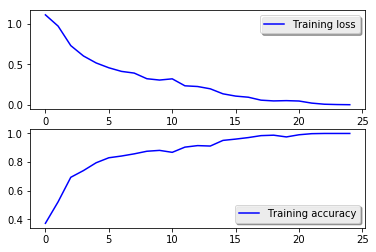

In [85]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
legend = ax[1].legend(loc='best', shadow=True)